## Library import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')

## Pandas
- 정형데이터를 다루기 위한
- excel 보다는 프로그래밍 많이 SQL보다는 적게
- 타 프레임워크보다는 간단하고 numpy 기반으로 만들어졌기 때문에 다루기 쉽고<br>빠르게 작동한다
- numpy 의 structured array와 record array로 만들어졌다.

In [2]:
tips = sns.load_dataset('tips') 

In [10]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [11]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [13]:
tips.index

RangeIndex(start=0, stop=244, step=1)

- 전체는 DataFrame,
- 각각의 row와 col은 pd.Series형태

In [31]:
tips.info() ## category형은 실제로는 문자지만 몇개안되는 데이터로 실제 내부에서는 숫자로 관리
            ## int,float은 기본적으로 64 bits

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [25]:
mpg = sns.load_dataset('mpg')

In [28]:
mpg.info() ## 문자열 데이터들은 object형으로 표현

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [32]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [35]:
mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

In [36]:
tips.shape, mpg.shape

((244, 7), (398, 9))

In [39]:
tips.values ## array로 관리 ## structured array

array([[16.99, 1.01, 'Female', ..., 'Sun', 'Dinner', 2],
       [10.34, 1.66, 'Male', ..., 'Sun', 'Dinner', 3],
       [21.01, 3.5, 'Male', ..., 'Sun', 'Dinner', 3],
       ...,
       [22.67, 2.0, 'Male', ..., 'Sat', 'Dinner', 2],
       [17.82, 1.75, 'Male', ..., 'Sat', 'Dinner', 2],
       [18.78, 3.0, 'Female', ..., 'Thur', 'Dinner', 2]], dtype=object)

In [42]:
tips.to_numpy() ## .values와 같은 문법 ## array로 바꿔주기

array([[16.99, 1.01, 'Female', ..., 'Sun', 'Dinner', 2],
       [10.34, 1.66, 'Male', ..., 'Sun', 'Dinner', 3],
       [21.01, 3.5, 'Male', ..., 'Sun', 'Dinner', 3],
       ...,
       [22.67, 2.0, 'Male', ..., 'Sat', 'Dinner', 2],
       [17.82, 1.75, 'Male', ..., 'Sat', 'Dinner', 2],
       [18.78, 3.0, 'Female', ..., 'Thur', 'Dinner', 2]], dtype=object)

In [44]:
tips.axes ## (tips.index, tips.columns) axis=0, axis=1을 동시에 보여준다

[RangeIndex(start=0, stop=244, step=1),
 Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')]

In [45]:
tips.size

1708

In [48]:
tips.memory_usage() ## col별 메모리 사용량 ===> 한번에 메모리에 올릴 수 있어 excel 보다 훨씬 빠르다

Index          128
total_bill    1952
tip           1952
sex            340
smoker         340
day            436
time           340
size          1952
dtype: int64

- 메모리 사용량을 보고 자신의 하드웨어 용량에 맞추어 병렬처리를 할지 안할지 미리 결정할 수 있다.

### column에 접근하는 방식

In [68]:
tips['tip']## structured array

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [62]:
tips.tip ## record array

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [69]:
tips[['tip']] ## fancy indexing 방식 

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61
...,...
239,5.92
240,2.00
241,2.00
242,1.75


In [70]:
tips['tip'].shape, tips[['tip']].shape ## fancy indexing은 2차원이다

((244,), (244, 1))

In [74]:
tips[tips.day == 'Sun'] ## boolean indexing

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3
187,30.46,2.00,Male,Yes,Sun,Dinner,5
188,18.15,3.50,Female,Yes,Sun,Dinner,3
189,23.10,4.00,Male,Yes,Sun,Dinner,3


In [76]:
tips.select_dtypes(exclude = 'int64') ## dtype별 indexing가능

,total_bill,tip,sex,smoker,day,time
0,16.99,1.01,Female,No,Sun,Dinner
1,10.34,1.66,Male,No,Sun,Dinner
2,21.01,3.50,Male,No,Sun,Dinner
3,23.68,3.31,Male,No,Sun,Dinner
4,24.59,3.61,Female,No,Sun,Dinner
...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner
240,27.18,2.00,Female,Yes,Sat,Dinner
241,22.67,2.00,Male,Yes,Sat,Dinner
242,17.82,1.75,Male,No,Sat,Dinner


In [80]:
tips.filter(regex='^t') ## 정규식을 사용하여 filtering 가능l(col 뽑아내기) ^t ==> t로 시작되는 문자

,total_bill,tip,time
0,16.99,1.01,Dinner
1,10.34,1.66,Dinner
2,21.01,3.50,Dinner
3,23.68,3.31,Dinner
4,24.59,3.61,Dinner
...,...,...,...
239,29.03,5.92,Dinner
240,27.18,2.00,Dinner
241,22.67,2.00,Dinner
242,17.82,1.75,Dinner


### Row에 접근하는 방식(loc, iloc)

In [81]:
tips2 = tips.set_index('time') ## column중 하나를 index로 설정할 수 있다.

In [82]:
tips2

,total_bill,tip,sex,smoker,day,size
time,,,,,,
Dinner,16.99,1.01,Female,No,Sun,2
Dinner,10.34,1.66,Male,No,Sun,3
Dinner,21.01,3.50,Male,No,Sun,3
Dinner,23.68,3.31,Male,No,Sun,2
Dinner,24.59,3.61,Female,No,Sun,4
...,...,...,...,...,...,...
Dinner,29.03,5.92,Male,No,Sat,3
Dinner,27.18,2.00,Female,Yes,Sat,2
Dinner,22.67,2.00,Male,Yes,Sat,2


- index가 같은값으로 이루어져도 indexing가능하다

In [88]:
tips2.iloc[5:] 

,total_bill,tip,sex,smoker,day,size
time,,,,,,
Dinner,25.29,4.71,Male,No,Sun,4
Dinner,8.77,2.00,Male,No,Sun,2
Dinner,26.88,3.12,Male,No,Sun,4
Dinner,15.04,1.96,Male,No,Sun,2
Dinner,14.78,3.23,Male,No,Sun,2
...,...,...,...,...,...,...
Dinner,29.03,5.92,Male,No,Sat,3
Dinner,27.18,2.00,Female,Yes,Sat,2
Dinner,22.67,2.00,Male,Yes,Sat,2


In [91]:
tips2.loc['Lunch'] ## 'Lunch' index 추출하기

,total_bill,tip,sex,smoker,day,size
time,,,,,,
Lunch,27.20,4.00,Male,No,Thur,4
Lunch,22.76,3.00,Male,No,Thur,2
Lunch,17.29,2.71,Male,No,Thur,2
Lunch,19.44,3.00,Male,Yes,Thur,2
Lunch,16.66,3.40,Male,No,Thur,2
...,...,...,...,...,...,...
Lunch,8.58,1.92,Male,Yes,Fri,1
Lunch,15.98,3.00,Female,No,Fri,3
Lunch,13.42,1.58,Male,Yes,Fri,2


- loc[:a] 는 a-1이 아닌 a 번째 row까지 출력된다

In [93]:
tips.iloc[:3]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [94]:
tips.loc[:3]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2


In [96]:
tips.loc[0:3, 'tip':'day']

,tip,sex,smoker,day
0,1.01,Female,No,Sun
1,1.66,Male,No,Sun
2,3.50,Male,No,Sun
3,3.31,Male,No,Sun


In [98]:
tips.iloc[[3,0]] ## fancy indexing가능하다

,total_bill,tip,sex,smoker,day,time,size
3,23.68,3.31,Male,No,Sun,Dinner,2
0,16.99,1.01,Female,No,Sun,Dinner,2


In [104]:
%timeit tips.loc[1,'smoker']

21.4 µs ± 1.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [105]:
%timeit tips.iat[1,3]

10.4 µs ± 519 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


- at와 iat는 하나의 scalar 값에만 접근가능하다

In [107]:
tips.at[1, 'smoker'], tips.loc[1, 'smoker']

('No', 'No')

In [108]:
tips.iloc[1,3], tips.iat[1,3]

('No', 'No')

In [111]:
tips.day.where(tips.day=='Sat') ## 아닌거는 NAN으로 반환

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
239    Sat
240    Sat
241    Sat
242    Sat
243    NaN
Name: day, Length: 244, dtype: category
Categories (4, object): [Thur, Fri, Sat, Sun]

### Pandas ====> 원하는 값을 select할 수 있다
- 데이터 처리
- EDA
- visualization

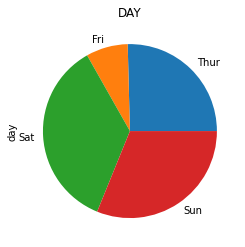

In [126]:
plt.title('DAY')
tips.day.value_counts().sort_index().plot.pie()
## matplotlib과 연동되어진다

- value_counts는 각각의 series에 대해 효과가 있다

### index가 x축이다. (그래프 그릴 경우에는)

In [128]:
iris = sns.load_dataset('iris')  

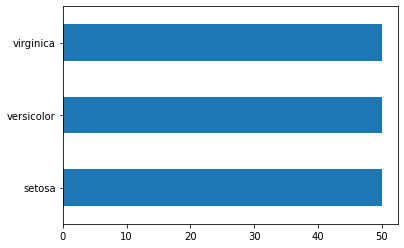

In [133]:
iris.species.value_counts().sort_index().plot.barh()

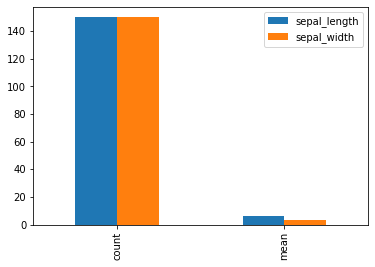

In [144]:
iris.filter(regex='^sepal').describe().loc[['count','mean']].plot.bar() ## 통계값구하기

In [145]:
'__iter__' in dir(tips)

True

In [183]:
for i in tips:
    print(i) ## iter로 사용가능하고 col_name을 뽑아준다

total_bill
tip
sex
smoker
day
time
size


In [184]:
tips.sex.map({"Female":0, "Male":1}) ## col의 값들을 바꿔주기

0      0
1      1
2      1
3      1
4      0
      ..
239    1
240    0
241    1
242    1
243    0
Name: sex, Length: 244, dtype: category
Categories (2, int64): [1, 0]

In [185]:
tips.tip.map(lambda x : x+1) # lambda함수를 사용하여 전체적으로 바꿔줄수도 있다.

0      2.01
1      2.66
2      4.50
3      4.31
4      4.61
       ... 
239    6.92
240    3.00
241    3.00
242    2.75
243    4.00
Name: tip, Length: 244, dtype: float64

In [189]:
tips.tip.map(lambda x: (x - tips.tip.mean())/tips.tip.std()) #정규화하기

0     -1.436993
1     -0.967217
2      0.362610
3      0.225291
4      0.442111
         ...   
239    2.111622
240   -0.721488
241   -0.721488
242   -0.902171
243    0.001244
Name: tip, Length: 244, dtype: float64

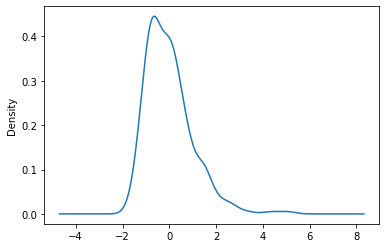

In [190]:
tips.tip.map(lambda x: (x - tips.tip.mean())/tips.tip.std()).plot.kde()

### Data Wranggling / Munging ===> pandas의 tool
- 통계분석 ===> statsmodel
- 머신러닝 ===> sklearn
- 딥러닝 ====> tensorflow, pytorch
- 시계열 =====> fbprophet

### Data 처리 
- 구조적 처리
- 데이터 값 자체 처리


In [196]:
tips ## aggregation 하기 쉽다

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


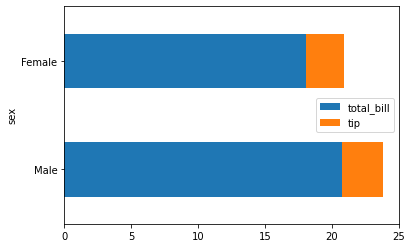

In [207]:
tips.groupby('sex').mean()[['total_bill','tip']].plot.barh(stacked=True)

In [3]:
pew = pd.read_csv('pew.txt', sep='\t') ## txt파일 읽는 법

In [230]:
pew.head() ## wide format ==> col name이 길때

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116


In [232]:
pew.melt('religion') ## ===> long format 

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [233]:
pew.melt('religion', var_name='moon', value_name='VAL') ## variable과 value의 이름을 바꿀수있다

,religion,moon,VAL
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [234]:
pew_tidy = pew.melt('religion')

In [235]:
pew_tidy.rename({"variable":'moon'}, axis=1) ## variable의 이름을 다음과 같이 바꿀 수도 있다.

,religion,moon,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [238]:
pew_tidy.rename(columns={"variable":"moon"}) ## column을 사용하면 axis=1과 같은 의미

,religion,moon,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [240]:
pew_tidy.rename({0:'moon'},axis=0) ## row 바꾸어주기

,religion,variable,value
moon,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [242]:
pew_tidy.rename(index={0:'moon'}) ## index 사용할경우 axis=0과 같은 의미

,religion,variable,value
moon,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


- python의 copy는 얕은 copy
- numpy 의 copy는 깊은 copy


In [243]:
pew_tidy.rename({"variable":'moon'}, axis=1, inplace=True) ## inplace=True일경우 재할당 해줄 필요가 없다

In [245]:
pew_tidy ## inplace 해주거나 재할당 해주어야지 반영이 된다

,religion,moon,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [246]:
pew_tidy.pivot('religion','moon','value') ## religion ==> index, moon(variable) ===> columns,  value ===> 해당 값들

moon,$10-20k,$100-150k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,<$10k,>150k,Don't know/refused
religion,,,,,,,,,,
Agnostic,34,109,60,81,76,137,122,27,84,96
Atheist,27,59,37,52,35,70,73,12,74,76
Buddhist,21,39,30,34,33,58,62,27,53,54
Catholic,617,792,732,670,638,1116,949,418,633,1489
Don’t know/refused,14,17,15,11,10,35,21,15,18,116
Evangelical Prot,869,723,1064,982,881,1486,949,575,414,1529
Hindu,9,48,7,9,11,34,47,1,54,37
Historically Black Prot,244,81,236,238,197,223,131,228,78,339
Jehovah's Witness,27,11,24,24,21,30,15,20,6,37


### Stack / UnStack
- stack : col의 내용을 index로 만드는 것
- unstack : index를 col의 내용으로 만드는 것

In [10]:
pew.set_index('religion').stack().reset_index().sort_values('level_1').reset_index(drop=True)

,religion,level_1,0
0,Jehovah's Witness,$10-20k,27
1,Mormon,$10-20k,40
2,Buddhist,$10-20k,21
3,Jewish,$10-20k,19
4,Muslim,$10-20k,7
...,...,...,...
175,Buddhist,Don't know/refused,54
176,Atheist,Don't know/refused,76
177,Agnostic,Don't know/refused,96
178,Other Faiths,Don't know/refused,71


In [262]:
pew.melt(['religion']) ## list형태로 받을수 있다.

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [275]:
bil = pd.read_csv('./aaa.csv',encoding='latin1')

In [276]:
bil

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,98,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,2000-02-12,99,99.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,2000-07-01,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [277]:
bil_melt = bil.melt(bil.columns[:7])

In [278]:
bil_melt

,year,artist.inverted,track,time,genre,date.entered,date.peaked,variable,value
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,x1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,x1st.week,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x1st.week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,x1st.week,57.0
...,...,...,...,...,...,...,...,...,...
24087,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,x76th.week,NaN
24088,2000,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,2000-02-12,x76th.week,NaN
24089,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,x76th.week,NaN
24090,2000,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,2000-07-01,x76th.week,NaN


In [294]:
bil_melt.variable.dtypes ## object dtype을 가진다

dtype('O')

In [295]:
bil_melt.variable.str.extract(r"(\d+)", expand=True) ## 문자열 데이터에 관해서는 str을 붙힐경우 추가 기능을 사용할 수 있다.

,0
0,1
1,1
2,1
3,1
4,1
...,...
24087,76
24088,76
24089,76
24090,76


- category 데이터는 .cat을
- 시계열 데이터는 .dt를 붙힐경우 추가 기능 사용가능

In [297]:
import datetime ## 시계열 데이터 처리시 필요한 라이브러리

In [302]:
bil_melt['date.entered'] = pd.to_datetime(bil_melt['date.entered'])

In [305]:
bil_melt.set_index('date.entered').sort_values('date.entered')

,year,artist.inverted,track,time,genre,date.peaked,variable,value
date.entered,,,,,,,,
1999-06-05,2000,Lonestar,Amazed,4:25,Country,2000-03-04,x7th.week,29.0
1999-06-05,2000,Lonestar,Amazed,4:25,Country,2000-03-04,x6th.week,33.0
1999-06-05,2000,Lonestar,Amazed,4:25,Country,2000-03-04,x23rd.week,NaN
1999-06-05,2000,Lonestar,Amazed,4:25,Country,2000-03-04,x74th.week,NaN
1999-06-05,2000,Lonestar,Amazed,4:25,Country,2000-03-04,x70th.week,NaN
...,...,...,...,...,...,...,...,...
2000-12-30,2000,Tuesday,I Know,4:06,Rock,2000-12-30,x19th.week,NaN
2000-12-30,2000,Tuesday,I Know,4:06,Rock,2000-12-30,x49th.week,NaN
2000-12-30,2000,Tuesday,I Know,4:06,Rock,2000-12-30,x34th.week,NaN


In [306]:
tb = pd.read_csv('tb.csv')

In [307]:
tb

,iso2,year,new_sp,new_sp_m04,new_sp_m514,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,...,new_sp_f04,new_sp_f514,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65,new_sp_fu
0,AD,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,1993,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,ZW,2004,14581.0,NaN,NaN,187.0,833.0,2908.0,2298.0,1056.0,...,NaN,NaN,225.0,1140.0,2858.0,1565.0,622.0,214.0,111.0,NaN
5765,ZW,2005,13155.0,NaN,NaN,210.0,837.0,2264.0,1855.0,762.0,...,NaN,NaN,269.0,1136.0,2242.0,1255.0,578.0,193.0,603.0,NaN
5766,ZW,2006,12718.0,NaN,NaN,215.0,736.0,2391.0,1939.0,896.0,...,NaN,NaN,237.0,1020.0,2424.0,1355.0,632.0,230.0,96.0,NaN
5767,ZW,2007,10583.0,6.0,132.0,138.0,500.0,3693.0,0.0,716.0,...,7.0,178.0,185.0,739.0,3311.0,0.0,553.0,213.0,90.0,NaN


In [308]:
tb_melt = tb.melt(tb.columns[:2])

In [309]:
tb_melt

,iso2,year,variable,value
0,AD,1989,new_sp,NaN
1,AD,1990,new_sp,NaN
2,AD,1991,new_sp,NaN
3,AD,1992,new_sp,NaN
4,AD,1993,new_sp,15.0
...,...,...,...,...
121144,ZW,2004,new_sp_fu,NaN
121145,ZW,2005,new_sp_fu,NaN
121146,ZW,2006,new_sp_fu,NaN
121147,ZW,2007,new_sp_fu,NaN


In [318]:
tb_melt = tb_melt.dropna().reset_index(drop=True) ## nan을 제거핢으로서 구조적 변화

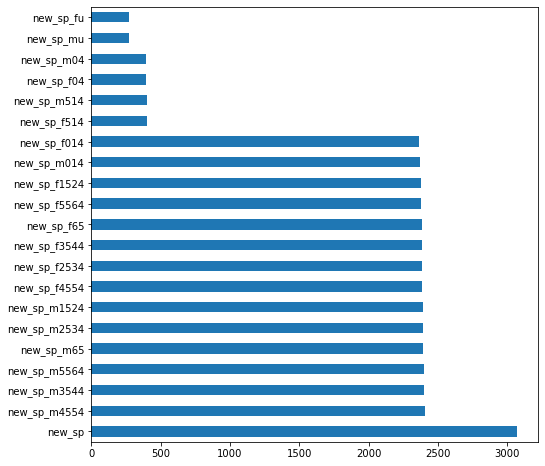

In [321]:
plt.figure(figsize=(8,8))
tb_melt.variable.value_counts().plot.barh()

In [323]:
"__iter__" in dir(tb)

True

### 성별 뽑기

In [342]:
tb.drop('new_sp', axis=1, inplace=True) ## 성별이 나와있지 않는 col 삭제하기

In [347]:
tb_melt = tb.melt(tb.columns[:2]).dropna().reset_index(drop=True) ## chaining

In [358]:
tb_melt['sex'] = tb_melt.variable.str[7:8] ## 새로운 column 생성

In [359]:
tb_melt

,iso2,year,variable,value,sex
0,AD,2005,new_sp_m04,0.0,m
1,AD,2006,new_sp_m04,0.0,m
2,AD,2008,new_sp_m04,0.0,m
3,AE,2006,new_sp_m04,0.0,m
4,AE,2007,new_sp_m04,0.0,m
...,...,...,...,...,...
35547,VU,2008,new_sp_fu,0.0,f
35548,YE,2008,new_sp_fu,0.0,f
35549,ZA,2008,new_sp_fu,0.0,f
35550,ZM,2008,new_sp_fu,0.0,f


### aggregation 
- groupby, crosstab, pivot 

In [365]:
'__iter__' in dir(tips.groupby('sex'))

True

In [366]:
t = tips.groupby('sex')

In [380]:
for i in t:
    print(i) ## split
    

('Male',      total_bill   tip   sex smoker  day    time  size
1         10.34  1.66  Male     No  Sun  Dinner     3
2         21.01  3.50  Male     No  Sun  Dinner     3
3         23.68  3.31  Male     No  Sun  Dinner     2
5         25.29  4.71  Male     No  Sun  Dinner     4
6          8.77  2.00  Male     No  Sun  Dinner     2
..          ...   ...   ...    ...  ...     ...   ...
236       12.60  1.00  Male    Yes  Sat  Dinner     2
237       32.83  1.17  Male    Yes  Sat  Dinner     2
239       29.03  5.92  Male     No  Sat  Dinner     3
241       22.67  2.00  Male    Yes  Sat  Dinner     2
242       17.82  1.75  Male     No  Sat  Dinner     2

[157 rows x 7 columns])
('Female',      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
11        35.26  5.00  Female     No   Sun  Dinner     4
14        14.83  3.02  Female     No   Sun  Dinner     2
16        10.33  1.67 

In [382]:
tips.describe() ## 숫자형 데이터만 표시가 된다.

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [383]:
tips.describe(include='category') ## include 옵션을 통해 category 데이터도 관찰해 주기

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [19]:
tips.groupby(['sex', 'day']).mean()

total_bill       tip      size
sex    day                                 
Male   Thur   18.714667  2.980333  2.433333
       Fri    19.857000  2.693000  2.100000
       Sat    20.802542  3.083898  2.644068
       Sun    21.887241  3.220345  2.810345
Female Thur   16.715312  2.575625  2.468750
       Fri    14.145556  2.781111  2.111111
       Sat    19.680357  2.801786  2.250000
       Sun    19.872222  3.367222  2.944444

In [20]:
tips.groupby(['sex','day']).mean().stack() ## ==> columns인 total_bill, tip, size가 index로 온다

sex     day             
Male    Thur  total_bill    18.714667
              tip            2.980333
              size           2.433333
        Fri   total_bill    19.857000
              tip            2.693000
              size           2.100000
        Sat   total_bill    20.802542
              tip            3.083898
              size           2.644068
        Sun   total_bill    21.887241
              tip            3.220345
              size           2.810345
Female  Thur  total_bill    16.715312
              tip            2.575625
              size           2.468750
        Fri   total_bill    14.145556
              tip            2.781111
              size           2.111111
        Sat   total_bill    19.680357
              tip            2.801786
              size           2.250000
        Sun   total_bill    19.872222
              tip            3.367222
              size           2.944444
dtype: float64

In [386]:
tips.groupby(['sex','day']).mean().stack().reset_index() ## DataFrame 형태로 바꾸어주기

,sex,day,level_2,0
0,Male,Thur,total_bill,18.714667
1,Male,Thur,tip,2.980333
2,Male,Thur,size,2.433333
3,Male,Fri,total_bill,19.857000
4,Male,Fri,tip,2.693000
5,Male,Fri,size,2.100000
6,Male,Sat,total_bill,20.802542
7,Male,Sat,tip,3.083898
8,Male,Sat,size,2.644068
9,Male,Sun,total_bill,21.887241


In [22]:
tips.groupby(['sex','day']).mean().unstack() ## 옆으로 펼쳐서 보여주기

total_bill                                        tip            \
day          Thur        Fri        Sat        Sun      Thur       Fri   
sex                                                                      
Male    18.714667  19.857000  20.802542  21.887241  2.980333  2.693000   
Female  16.715312  14.145556  19.680357  19.872222  2.575625  2.781111   

                                size                                
day          Sat       Sun      Thur       Fri       Sat       Sun  
sex                                                                 
Male    3.083898  3.220345  2.433333  2.100000  2.644068  2.810345  
Female  2.801786  3.367222  2.468750  2.111111  2.250000  2.944444

In [390]:
tips.groupby(['sex','day']).agg(['mean','std']) ## 단축표현 지원 agg == aggregate

total_bill                  tip                size          
                  mean        std      mean       std      mean       std
sex    day                                                               
Male   Thur  18.714667   8.019728  2.980333  1.353734  2.433333  1.006302
       Fri   19.857000  10.015847  2.693000  1.136428  2.100000  0.737865
       Sat   20.802542   9.836306  3.083898  1.791360  2.644068  0.846142
       Sun   21.887241   9.129142  3.220345  1.271172  2.810345  1.033762
Female Thur  16.715312   7.759764  2.575625  1.109286  2.468750  1.135480
       Fri   14.145556   4.788547  2.781111  0.938862  2.111111  0.333333
       Sat   19.680357   8.806470  2.801786  1.234480  2.250000  0.700529
       Sun   19.872222   7.837513  3.367222  1.136775  2.944444  0.937595

In [393]:
tips.kurt() == tips.kurtosis() ## 단축표현

total_bill    True
tip           True
size          True
dtype: bool

In [396]:
tips.groupby('sex').mean()[['total_bill']]

,total_bill
sex,
Male,20.744076
Female,18.056897


In [397]:
tips.groupby('sex')[['total_bill']].mean()

,total_bill
sex,
Male,20.744076
Female,18.056897


In [400]:
tips.groupby(['sex']).transform(lambda x : x+1) ## sex데이터에 관해서 숫자 데이터들에 +1 해주기

,total_bill,tip,size
0,17.99,2.01,3
1,11.34,2.66,4
2,22.01,4.50,4
3,24.68,4.31,3
4,25.59,4.61,5
...,...,...,...
239,30.03,6.92,4
240,28.18,3.00,3
241,23.67,3.00,3
242,18.82,2.75,3


In [404]:
tips.pivot_table('tip', 'sex', 'day',margins=True) ## tips ==> value, sex==> index, day===> columns

day,Thur,Fri,Sat,Sun,All
sex,,,,,
Male,2.980333,2.693000,3.083898,3.220345,3.089618
Female,2.575625,2.781111,2.801786,3.367222,2.833448
All,2.771452,2.734737,2.993103,3.255132,2.998279


In [407]:
pd.pivot_table(tips, 'tip', 'sex','day', aggfunc = 'max',margins=True)

day,Thur,Fri,Sat,Sun,All
sex,,,,,
Male,6.70,4.73,10.0,6.5,10.0
Female,5.17,4.30,6.5,5.2,6.5
All,6.70,4.73,10.0,6.5,10.0


In [410]:
pd.crosstab(tips.sex,[tips.day,tips.smoker], margins=True)

day    Thur     Fri    Sat     Sun      All
smoker  Yes  No Yes No Yes  No Yes  No     
sex                                        
Male     10  20   8  2  27  32  15  43  157
Female    7  25   7  2  15  13   4  14   87
All      17  45  15  4  42  45  19  57  244

## Recomandation System(Pandas)

- Collaborative filtering
- 나의 과거 행동을 기반으로 나와 비슷한 다른 사람이 했던것을 추천해주는 system

1.사람과 아이템 별로 테이블을 만들기<br>
2.과거의 행적을 기록한다<br>
3.matrix 형식으로 만들기(0,1)<br>
4.유사도 계산하기 ==> 유사도 matrix 구하기


In [415]:
user = pd.read_csv('./ml-1m/ml-1m/users.dat', sep='::', header=None, engine='python')

In [433]:
user.rename(columns={0:"user_id",1:"gender", 2:"age",3:"occupation",4:"zip_code"}, inplace=True)

In [434]:
user

,user_id,gender,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [421]:
movie = pd.read_csv('./ml-1m/ml-1m/movies.dat', sep='::',header=None, encoding='latin1', engine='python', )

In [422]:
movie

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [23]:
rating = pd.read_csv('./ml-1m/ml-1m/ratings.dat', sep='::', header=None, engine='python')

In [24]:
rating = rating.rename(columns={0:'user_id', 1:"movie_id", 2:"rating",3:'timestamp'})    

In [25]:
rating

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [430]:
rating.timestamp = pd.to_datetime(rating.timestamp, unit='s')

In [431]:
rating

,user_id,movie_id,rating,timestamp
0,1,1193,5,2000-12-31 22:12:40
1,1,661,3,2000-12-31 22:35:09
2,1,914,3,2000-12-31 22:32:48
3,1,3408,4,2000-12-31 22:04:35
4,1,2355,5,2001-01-06 23:38:11
...,...,...,...,...
1000204,6040,1091,1,2000-04-26 02:35:41
1000205,6040,1094,5,2000-04-25 23:21:27
1000206,6040,562,5,2000-04-25 23:19:06
1000207,6040,1096,4,2000-04-26 02:20:48


In [435]:
rating.merge(user) ## user_id에 맞춰서 col 추가되어진다.

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip_code
0,1,1193,5,2000-12-31 22:12:40,F,1,10,48067
1,1,661,3,2000-12-31 22:35:09,F,1,10,48067
2,1,914,3,2000-12-31 22:32:48,F,1,10,48067
3,1,3408,4,2000-12-31 22:04:35,F,1,10,48067
4,1,2355,5,2001-01-06 23:38:11,F,1,10,48067
...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,2000-04-26 02:35:41,M,25,6,11106
1000205,6040,1094,5,2000-04-25 23:21:27,M,25,6,11106
1000206,6040,562,5,2000-04-25 23:19:06,M,25,6,11106
1000207,6040,1096,4,2000-04-26 02:20:48,M,25,6,11106


In [26]:
rating.drop('timestamp', axis=1, inplace=True)

In [32]:
rating.pivot('user_id', 'movie_id','rating').fillna(0)

movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [445]:
rating.set_index(['user_id','movie_id']).unstack().fillna(0) ## 사람별로 영화 평점을 준 matrix

rating                                               ...            \
movie_id   1    2    3    4    5    6    7    8    9    10    ... 3943 3944   
user_id                                                       ...             
1           5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
5           0.0  0.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
6036        0.0  0.0  0.0  2.0  0.0  3.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
6037        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
6038        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
6039        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
6040        3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

                                                  
movie_id 3945 3946 3947 3948 3949 3950 3951 3952  
user_id                                           
1         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...       ...  ...  ...  ...  ...  ...  ...  ...  
6036      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
6037      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
6038      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
6039      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
6040      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[6040 rows x 3706 columns]

In [446]:
basic = rating.pivot('user_id','movie_id','rating').fillna(0)

- user_id ==> index, movie_id ====> columns 거기에 따른 rating정보를 표로 담는다

In [447]:
basic

movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
basic_corr = basic.transpose().corr()

In [ ]:
def closed_user(user_id,k=5):
    return basic_corr.loc[user_id].sort_values(ascending=False)[1:k+1]

In [ ]:
x = rating[(rating.user_id == 3000) & (rating.rating==5)].movie_id.values()

In [ ]:
y = rating[(rating.user_id == 3) & (rating.rating==5)].movie_id.values()

In [ ]:
set(x)-set(y)

In [ ]:
def best_close_movie_recomendation(user_id):
    user = (close_user(user_id, k=1).index)[0] ## 가장 상관관계가 높은 다른 user 1명만 추출
    movie = set(rating[(rating.user_id == user) & (rating.rating==5)].movie_id.values) ## 상관관계 높은 사람이 평점 5점을 준 영화 id 추출
    my_movie = set(rating[rating.user_id == user_id].movie_id.values) ## 본인의 영화 id 추출
    
    return print(f" user_id :{user_id}, recomend_movie :{movie - my_movie}")

- pandas를 활용하여 추천해주는 func 만들어보기